In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
filename = '../../data/NBAShot Locations1997-2020.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [6]:
df.describe()

,Game ID,Game Event ID,Player ID,Team ID,Period,Minutes Remaining,Seconds Remaining,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date
count,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06,4.729512e+06
mean,2.314379e+07,2.501681e+02,1.639145e+05,1.610613e+09,2.477790e+00,5.332437e+00,2.873821e+01,1.208963e+01,-1.316958e+00,7.634400e+01,4.517832e-01,2.008996e+07
std,5.521124e+06,1.589274e+02,3.733497e+05,8.595674e+00,1.139482e+00,3.468664e+00,1.745678e+01,9.850088e+00,1.100864e+02,8.703236e+01,4.976698e-01,6.512593e+04
min,2.000000e+07,1.000000e+00,3.000000e+00,1.610613e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+02,-5.200000e+01,0.000000e+00,1.997103e+07
25%,2.060015e+07,1.130000e+02,1.515000e+03,1.610613e+09,1.000000e+00,2.000000e+00,1.400000e+01,2.000000e+00,-6.000000e+01,3.000000e+00,0.000000e+00,2.003120e+07
50%,2.120030e+07,2.450000e+02,2.550000e+03,1.610613e+09,2.000000e+00,5.000000e+00,2.900000e+01,1.300000e+01,0.000000e+00,3.800000e+01,0.000000e+00,2.009033e+07
75%,2.170117e+07,3.750000e+02,2.019370e+05,1.610613e+09,3.000000e+00,8.000000e+00,4.400000e+01,2.100000e+01,5.600000e+01,1.450000e+02,1.000000e+00,2.015013e+07
max,4.990009e+07,1.012000e+03,1.629760e+06,1.610613e+09,8.000000e+00,1.200000e+01,5.900000e+01,8.900000e+01,2.500000e+02,8.840000e+02,1.000000e+00,2.020031e+07


In [33]:
def field_goal_percentage(name : str) -> int :
    total_shots = len(df[df['Player Name'] == name])
    assert total_shots > 0 , 'Player not Found'
    made_shots = len(df[(df['Player Name'] == name) & (df['Shot Made Flag'] == 1)])
    
    return (made_shots / total_shots) * 100

In [34]:
field_goal_percentage('Stephen Curry')

47.220252446461494

In [36]:
field_goal_percentage('LeBron James')

50.175332119495586

In [37]:
field_goal_percentage('Kevin Durant')

48.99364689552079

In [31]:
shot_type = df['Shot Type'].unique()
shot_type

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [38]:
for st in shot_type:
    shot_count = len(df[df['Shot Type'] == st])
    print(f'{st} : {shot_count}')

2PT Field Goal : 3606005
3PT Field Goal : 1123507


In [39]:
shot_zone_range = df['Shot Zone Range'].unique()
shot_zone_range

array(['8-16 ft.', 'Less Than 8 ft.', '24+ ft.', '16-24 ft.',
       'Back Court Shot'], dtype=object)

In [40]:
shot_zone_range_count = []
for szr in shot_zone_range:
    shot_count = len(df[df['Shot Zone Range'] == szr])
    print(f'{szr} : {shot_count}')
    shot_zone_range_count.append(shot_count)


8-16 ft. : 749100
Less Than 8 ft. : 1938200
24+ ft. : 1110619
16-24 ft. : 919994
Back Court Shot : 11599


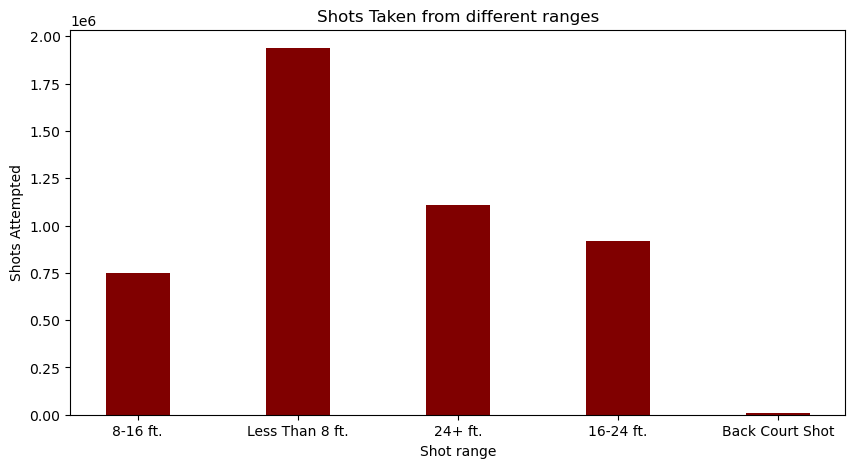

In [41]:
ig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(shot_zone_range, shot_zone_range_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Shot range")
plt.ylabel("Shots Attempted")
plt.title("Shots Taken from different ranges")
plt.show()

In [ ]:
df2 = df.pivot_table(columns='Shot Made Flag',values='Shot Zone Range')
df2

In [60]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [61]:
len(df)

4729512